In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


## Import the Fashion MNIST dataset

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data



In [4]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [5]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [7]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [8]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. 

If you see the first image you'll the range is from 0 to 255 

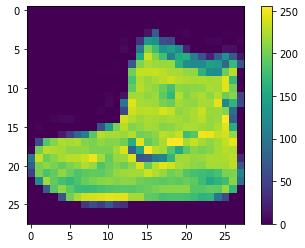

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

we'll scale this value from 0 to 1

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

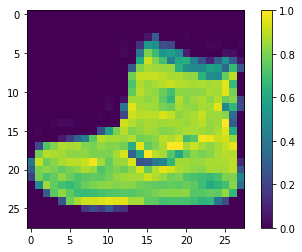

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

For verifying let's see the first 20 images.

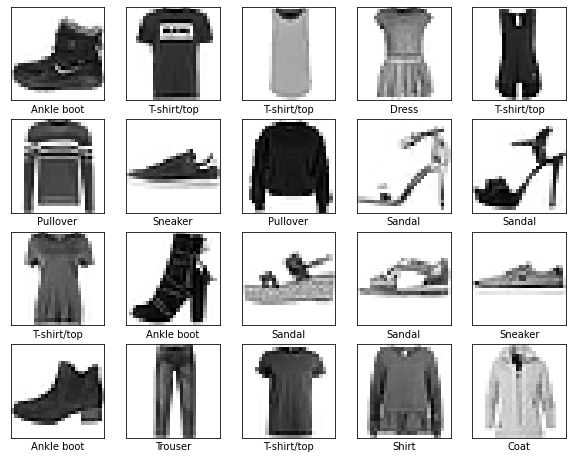

In [12]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model



### Set up the layers



In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels).

This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model


1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the `model.fit` method

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.4968 - acc: 0.8252
Epoch 2/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.3727 - acc: 0.8652
Epoch 3/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3375 - acc: 0.8759
Epoch 4/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3143 - acc: 0.8850
Epoch 5/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.2972 - acc: 0.8914
Epoch 6/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2819 - acc: 0.8954
Epoch 7/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2725 - acc: 0.8988
Epoch 8/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.2598 - acc: 0.9039
Epoch 9/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2535 - acc: 0.9053
Epoch 10/10
60000/60000 [==============================] - 7s 119us/sam

------------------------------------------------------------------------------------------------------------------------------
As the model trains, the loss and accuracy metrics are displayed. 

This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Let's see how model performs on test data

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3277 - acc: 0.8837

Test accuracy: 0.8837


------------------------------------------------------------------------------------------------------------------------------
It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy represents *overfitting*. 

Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. 

An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. 


### Make predictions


Now the model is trained so you can use it to make predictions.

The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [17]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [19]:
predictions[0]

array([1.5397781e-08, 2.1922645e-07, 3.5464100e-11, 3.8081951e-09,
       2.2840892e-08, 8.7295339e-04, 3.2578723e-07, 1.6613605e-02,
       1.3584724e-06, 9.8251158e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [20]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [21]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

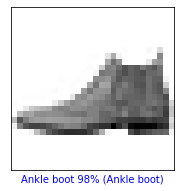

In [23]:
i = 0
plt.figure(figsize=(6,3))
plot_image(i, predictions[i], test_labels, test_images)


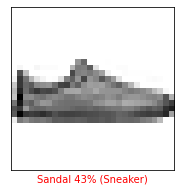

In [24]:
i = 12
plt.figure(figsize=(6,3))
plot_image(i, predictions[i], test_labels, test_images)


Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

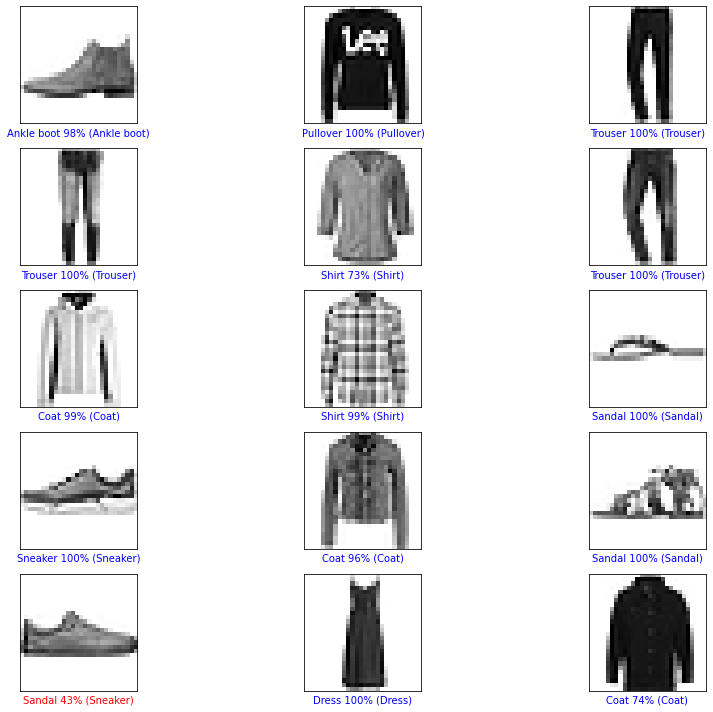

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [26]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [28]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[7.4497995e-04 9.0722933e-12 9.9720436e-01 2.5750196e-10 1.7624815e-03
  2.1476173e-15 2.8818622e-04 5.7661838e-23 5.5417928e-09 1.2911234e-15]]


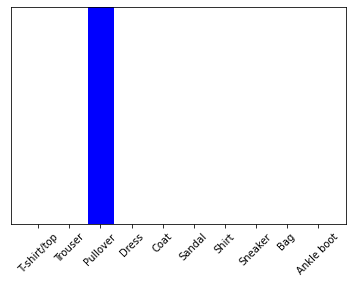

In [29]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [30]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.